In [2]:
import numpy as np 
import matplotlib.pyplot as plt
#%matplotlib inline
import cv2
import math
import pandas as pd
import soundfile as sf
import sounddevice as sd

In [3]:
# calculates MSE between original 256*256 img and comp img
def findMSE(orig , comp):
    return np.sum((orig - comp)**2)/(np.size(orig, 0)*np.size(orig, 1))

# Q1 - Image example

## 1 - a)

In [4]:
#normalize the image from 256 grayscale [0,255] to [0,1]
def normalizeTo01(img_matrix):
    return img_matrix/255

In [5]:
# creats the DFT matrix
def DFT_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * math.pi * 1J / N )
    W = np.power( omega, i * j ) / math.sqrt(N)
    return W
DFT_256 = DFT_matrix(256)
DFT_256_df = pd.DataFrame(DFT_256)
DFT_256_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,...,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j,0.062500+0.000000j
1,0.062500+0.000000j,0.062481-0.001534j,0.062425-0.003067j,0.062331-0.004598j,0.062199-0.006126j,0.062030-0.007651j,0.061824-0.009171j,0.061580-0.010685j,0.061299-0.012193j,0.060981-0.013694j,...,0.060627+0.015186j,0.060981+0.013694j,0.061299+0.012193j,0.061580+0.010685j,0.061824+0.009171j,0.062030+0.007651j,0.062199+0.006126j,0.062331+0.004598j,0.062425+0.003067j,0.062481+0.001534j
2,0.062500+0.000000j,0.062425-0.003067j,0.062199-0.006126j,0.061824-0.009171j,0.061299-0.012193j,0.060627-0.015186j,0.059809-0.018143j,0.058847-0.021056j,0.057742-0.023918j,0.056499-0.026722j,...,0.055120+0.029462j,0.056499+0.026722j,0.057742+0.023918j,0.058847+0.021056j,0.059809+0.018143j,0.060627+0.015186j,0.061299+0.012193j,0.061824+0.009171j,0.062199+0.006126j,0.062425+0.003067j
3,0.062500+0.000000j,0.062331-0.004598j,0.061824-0.009171j,0.060981-0.013694j,0.059809-0.018143j,0.058312-0.022493j,0.056499-0.026722j,0.054380-0.030806j,0.051967-0.034723j,0.049272-0.038452j,...,0.046309+0.041972j,0.049272+0.038452j,0.051967+0.034723j,0.054380+0.030806j,0.056499+0.026722j,0.058312+0.022493j,0.059809+0.018143j,0.060981+0.013694j,0.061824+0.009171j,0.062331+0.004598j
4,0.062500+0.000000j,0.062199-0.006126j,0.061299-0.012193j,0.059809-0.018143j,0.057742-0.023918j,0.055120-0.029462j,0.051967-0.034723j,0.048313-0.039650j,0.044194-0.044194j,0.039650-0.048313j,...,0.034723+0.051967j,0.039650+0.048313j,0.044194+0.044194j,0.048313+0.039650j,0.051967+0.034723j,0.055120+0.029462j,0.057742+0.023918j,0.059809+0.018143j,0.061299+0.012193j,0.062199+0.006126j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.062500+0.000000j,0.062030+0.007651j,0.060627+0.015186j,0.058312+0.022493j,0.055120+0.029462j,0.051099+0.035988j,0.046309+0.041972j,0.040823+0.047326j,0.034723+0.051967j,0.028101+0.055827j,...,0.021056-0.058847j,0.028101-0.055827j,0.034723-0.051967j,0.040823-0.047326j,0.046309-0.041972j,0.051099-0.035988j,0.055120-0.029462j,0.058312-0.022493j,0.060627-0.015186j,0.062030-0.007651j
252,0.062500+0.000000j,0.062199+0.006126j,0.061299+0.012193j,0.059809+0.018143j,0.057742+0.023918j,0.055120+0.029462j,0.051967+0.034723j,0.048313+0.039650j,0.044194+0.044194j,0.039650+0.048313j,...,0.034723-0.051967j,0.039650-0.048313j,0.044194-0.044194j,0.048313-0.039650j,0.051967-0.034723j,0.055120-0.029462j,0.057742-0.023918j,0.059809-0.018143j,0.061299-0.012193j,0.062199-0.006126j
253,0.062500+0.000000j,0.062331+0.004598j,0.061824+0.009171j,0.060981+0.013694j,0.059809+0.018143j,0.058312+0.022493j,0.056499+0.026722j,0.054380+0.030806j,0.051967+0.034723j,0.049272+0.038452j,...,0.046309-0.041972j,0.049272-0.038452j,0.051967-0.034723j,0.054380-0.030806j,0.056499-0.026722j,0.058312-0.022493j,0.059809-0.018143j,0.060981-0.013694j,0.061824-0.009171j,0.062331-0.004598j
254,0.062500+0.000000j,0.062425+0.003067j,0.062199+0.006126j,0.061824+0.009171j,0.061299+0.012193j,0.060627+0.015186j,0.059809+0.018143j,0.058847+0.021056j,0.057742+0.023918j,0.056499+0.026722j,...,0.055120-0.029462j,0.056499-0.026722j,0.057742-0.023918j,0.058847-0.021056j,0.059809-0.018143j,0.060627-0.015186j,0.061299-0.012193j,0.061824-0.009171j,0.062199-0.006126j,0.062425-0.003067j


### mandril_original

In [6]:
mandril_original = cv2.imread('mandril_original.png', cv2.IMREAD_GRAYSCALE)
mandril_original=normalizeTo01(mandril_original)
print(type(mandril_original))
print(mandril_original.shape)
mandril_original

<class 'numpy.ndarray'>
(256, 256)


array([[0.4       , 0.25490196, 0.36470588, ..., 0.34901961, 0.48235294,
        0.58039216],
       [0.38431373, 0.26666667, 0.31372549, ..., 0.44705882, 0.37254902,
        0.29803922],
       [0.37254902, 0.39215686, 0.30588235, ..., 0.37647059, 0.28235294,
        0.49019608],
       ...,
       [0.41960784, 0.55686275, 0.54901961, ..., 0.39607843, 0.36470588,
        0.34117647],
       [0.54117647, 0.58039216, 0.52156863, ..., 0.38039216, 0.36862745,
        0.34901961],
       [0.29019608, 0.25098039, 0.23137255, ..., 0.16078431, 0.15686275,
        0.14117647]])

Image mandril_original:


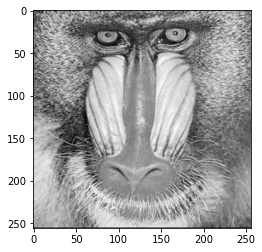

In [7]:
print("Image mandril_original:")
plt.imshow(np.array(mandril_original), cmap='gray')
#image is the size of 512*512


In [8]:
# finds the matrix which it columns are the DFT coefficients of the r-th row of the img 
def DFT_coef_mat_256(img):
    img_trans=img.transpose() # DFT on the rows of the original
    return np.matmul(DFT_256 , img_trans)

In [9]:
#finds the i-th coefficient of the r-th row (0 base)
def r_i_coefficient(r, i, coef_mat):
    return coef_mat[i][r]

In [10]:
coef_mandril_orig_mat = DFT_coef_mat_256(mandril_original)
coef_mandril_orig_mat_df = pd.DataFrame(coef_mandril_orig_mat)
print('The Coefficients are (each cloumn represents the i-th row coefficients of the image):')
coef_mandril_orig_mat_df

The Coefficients are (each cloumn represents the i-th row coefficients of the image):


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,7.874510+0.000000j,7.634559+0.000000j,7.661029+0.000000j,7.428922+0.000000j,7.523039+0.000000j,7.380882+0.000000j,7.295833+0.000000j,7.427941+0.000000j,7.415441+0.000000j,7.650980+0.000000j,...,8.857108+0.000000j,8.965441+0.000000j,9.046324+0.000000j,8.998039+0.000000j,8.961275+0.000000j,8.955637+0.000000j,8.956863+0.000000j,8.903676+0.000000j,9.221569+0.000000j,4.349020+0.000000j
1,-0.035688+0.281324j,0.038381+0.137900j,0.235945+0.092769j,0.396428+0.087934j,0.568239+0.088062j,0.664123+0.172888j,0.675152+0.200110j,0.680307+0.384742j,0.654569+0.456097j,0.357534+0.291663j,...,-0.753629-0.226599j,-0.888726-0.180598j,-1.013420-0.191989j,-1.079269-0.214974j,-1.139740-0.213735j,-1.198764-0.222794j,-1.235292-0.300540j,-1.274430-0.328867j,-1.393971-0.352601j,-0.628637-0.150718j
2,-0.103239+0.196632j,-0.279364+0.261335j,-0.380190+0.170719j,-0.376012+0.198315j,-0.404879+0.234788j,-0.348810+0.080096j,-0.379048-0.145816j,-0.371353-0.278182j,-0.383511-0.367032j,-0.296716-0.447705j,...,0.034375-0.208434j,0.072872-0.244682j,0.137337-0.268596j,0.258387-0.323828j,0.325139-0.334016j,0.360475-0.379347j,0.408526-0.411353j,0.441968-0.425468j,0.513015-0.455026j,0.173467-0.277882j
3,-0.172040+0.243600j,-0.338401+0.247177j,-0.470025+0.198698j,-0.258930+0.175902j,-0.123371+0.083969j,-0.107028+0.007880j,-0.082218+0.048546j,-0.085911+0.343773j,-0.147407+0.336364j,-0.061793+0.350885j,...,0.437203-0.428529j,0.437202-0.404342j,0.431983-0.394642j,0.464095-0.372804j,0.487604-0.358695j,0.451395-0.379523j,0.444058-0.324961j,0.412060-0.324434j,0.406988-0.342855j,0.158553-0.165237j
4,-0.220579+0.114536j,-0.173095+0.067109j,-0.031886-0.069797j,-0.086385-0.098883j,-0.002005+0.039028j,-0.146393+0.120692j,-0.193547-0.072305j,-0.143017+0.121829j,-0.192141+0.209968j,-0.356523+0.075146j,...,-0.289453-0.237750j,-0.349336-0.232809j,-0.328955-0.151103j,-0.356547-0.087938j,-0.368525-0.080529j,-0.409523-0.076073j,-0.417614-0.084200j,-0.438549-0.064101j,-0.458070-0.064093j,-0.117835-0.102106j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.011145-0.021164j,-0.168271-0.111579j,-0.139458-0.276163j,0.001768-0.252080j,-0.199557-0.186699j,-0.417214+0.008334j,-0.291415-0.163533j,-0.165577-0.159388j,-0.127434-0.068990j,-0.286280-0.066826j,...,-0.284375-0.087374j,-0.197250-0.041787j,-0.162451-0.029833j,-0.243770-0.078357j,-0.232797-0.055090j,-0.226210-0.070870j,-0.234213-0.064947j,-0.240434-0.034368j,-0.217693-0.001083j,-0.082312+0.004680j
252,-0.220579-0.114536j,-0.173095-0.067109j,-0.031886+0.069797j,-0.086385+0.098883j,-0.002005-0.039028j,-0.146393-0.120692j,-0.193547+0.072305j,-0.143017-0.121829j,-0.192141-0.209968j,-0.356523-0.075146j,...,-0.289453+0.237750j,-0.349336+0.232809j,-0.328955+0.151103j,-0.356547+0.087938j,-0.368525+0.080529j,-0.409523+0.076073j,-0.417614+0.084200j,-0.438549+0.064101j,-0.458070+0.064093j,-0.117835+0.102106j
253,-0.172040-0.243600j,-0.338401-0.247177j,-0.470025-0.198698j,-0.258930-0.175902j,-0.123371-0.083969j,-0.107028-0.007880j,-0.082218-0.048546j,-0.085911-0.343773j,-0.147407-0.336364j,-0.061793-0.350885j,...,0.437203+0.428529j,0.437202+0.404342j,0.431983+0.394642j,0.464095+0.372804j,0.487604+0.358695j,0.451395+0.379523j,0.444058+0.324961j,0.412060+0.324434j,0.406988+0.342855j,0.158553+0.165237j
254,-0.103239-0.196632j,-0.279364-0.261335j,-0.380190-0.170719j,-0.376012-0.198315j,-0.404879-0.234788j,-0.348810-0.080096j,-0.379048+0.145816j,-0.371353+0.278182j,-0.383511+0.367032j,-0.296716+0.447705j,...,0.034375+0.208434j,0.072872+0.244682j,0.137337+0.268596j,0.258387+0.323828j,0.325139+0.334016j,0.360475+0.379347j,0.408526+0.411353j,0.441968+0.425468j,0.513015+0.455026j,0.173467+0.277882j


### mandril_distorted

In [11]:
mandril_distorted = cv2.imread('mandril_distorted.png', cv2.IMREAD_GRAYSCALE)
mandril_distorted=normalizeTo01(mandril_distorted)


Image mandril_distorted:
(256, 256)


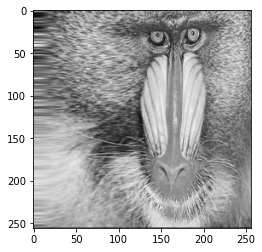

In [12]:
print("Image mandril_distorted:")
plt.imshow(np.array(mandril_distorted), cmap='gray')
#image is the size of 512*512
print(mandril_distorted.shape)

In [13]:
coef_mandril_dist_mat = DFT_coef_mat_256(mandril_distorted)
coef_mandril_dist_mat_df = pd.DataFrame(coef_mandril_dist_mat)
print('The coefficients are (each cloumn represents the i-th row coefficients of the image):')
coef_mandril_dist_mat_df

The Coefficients are (each cloumn represents the i-th row coefficients of the image):


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,7.586765+0.000000j,7.422304+0.000000j,7.521569+0.000000j,7.116667+0.000000j,7.272549+0.000000j,7.243873+0.000000j,7.193382+0.000000j,7.226225+0.000000j,7.319608+0.000000j,7.531618+0.000000j,...,8.751961+0.000000j,8.828431+0.000000j,8.745588+0.000000j,8.665441+0.000000j,8.676961+0.000000j,8.537255+0.000000j,8.431127+0.000000j,8.283088+0.000000j,8.722304+0.000000j,4.220343+0.000000j
1,-0.002682+0.415209j,-0.170290+0.336850j,-0.263433+0.175610j,-0.418790+0.140567j,-0.309275+0.029195j,-0.120750-0.134013j,-0.244286-0.193269j,-0.225963-0.058778j,-0.105605-0.067962j,-0.222758-0.054833j,...,-0.213580+0.008405j,-0.222043+0.098102j,-0.379848+0.168080j,-0.393821+0.133779j,-0.304673+0.156271j,-0.479713+0.156762j,-0.635742+0.124279j,-0.743422+0.120453j,-0.619628+0.106570j,-0.230422+0.024766j
2,0.040770+0.325317j,0.123444+0.564655j,0.020963+0.766552j,-0.221513+0.773378j,-0.276540+0.659326j,-0.461788+0.607250j,-0.615359+0.692493j,-0.472307+0.881982j,-0.400356+0.894244j,-0.406050+0.684174j,...,-0.353554-0.676606j,-0.350781-0.720845j,-0.432555-0.751308j,-0.458077-0.824864j,-0.369759-0.904193j,-0.529316-0.861768j,-0.608222-0.877643j,-0.696028-0.858144j,-0.558280-0.994572j,-0.216753-0.480355j
3,0.108457+0.376000j,0.023915+0.383662j,-0.166397+0.299485j,-0.432364+0.359340j,-0.557653+0.433591j,-0.467712+0.531166j,-0.475917+0.353247j,-0.305082+0.220359j,-0.234612+0.105854j,-0.000128+0.214043j,...,0.192215+0.007784j,0.268968-0.009310j,0.223467-0.012113j,0.346328-0.029155j,0.471291-0.050388j,0.436926+0.008668j,0.394274+0.075694j,0.340739+0.113874j,0.495879+0.011769j,0.181303-0.087468j
4,0.260081+0.109330j,0.230445+0.174245j,0.123286+0.211271j,-0.192836+0.283232j,-0.111812+0.221463j,0.009107+0.249669j,-0.109728+0.299137j,0.101376+0.449985j,0.237957+0.494749j,0.354790+0.440508j,...,0.092479-0.360455j,0.092837-0.326368j,0.027203-0.231914j,0.049811-0.212467j,0.153004-0.210125j,0.018811-0.148849j,-0.039656-0.084467j,-0.112244+0.013744j,-0.025470-0.014657j,0.061346-0.017636j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.113315+0.014809j,0.042297+0.067580j,0.023442+0.246228j,-0.131600-0.082847j,-0.162054-0.349224j,-0.272648-0.534561j,-0.245382-0.533054j,-0.201775-0.483544j,-0.132101-0.261697j,-0.168435-0.277292j,...,0.176702-0.108563j,0.211023-0.092481j,0.142596-0.129986j,0.102292-0.142458j,0.196458-0.083809j,0.108438-0.158611j,-0.012098-0.235202j,-0.060781-0.288532j,0.037713-0.138587j,0.078327+0.028952j
252,0.260081-0.109330j,0.230445-0.174245j,0.123286-0.211271j,-0.192836-0.283232j,-0.111812-0.221463j,0.009107-0.249669j,-0.109728-0.299137j,0.101376-0.449985j,0.237957-0.494749j,0.354790-0.440508j,...,0.092479+0.360455j,0.092837+0.326368j,0.027203+0.231914j,0.049811+0.212467j,0.153004+0.210125j,0.018811+0.148849j,-0.039656+0.084467j,-0.112244-0.013744j,-0.025470+0.014657j,0.061346+0.017636j
253,0.108457-0.376000j,0.023915-0.383662j,-0.166397-0.299485j,-0.432364-0.359340j,-0.557653-0.433591j,-0.467712-0.531166j,-0.475917-0.353247j,-0.305082-0.220359j,-0.234612-0.105854j,-0.000128-0.214043j,...,0.192215-0.007784j,0.268968+0.009310j,0.223467+0.012113j,0.346328+0.029155j,0.471291+0.050388j,0.436926-0.008668j,0.394274-0.075694j,0.340739-0.113874j,0.495879-0.011769j,0.181303+0.087468j
254,0.040770-0.325317j,0.123444-0.564655j,0.020963-0.766552j,-0.221513-0.773378j,-0.276540-0.659326j,-0.461788-0.607250j,-0.615359-0.692493j,-0.472307-0.881982j,-0.400356-0.894244j,-0.406050-0.684174j,...,-0.353554+0.676606j,-0.350781+0.720845j,-0.432555+0.751308j,-0.458077+0.824864j,-0.369759+0.904193j,-0.529316+0.861768j,-0.608222+0.877643j,-0.696028+0.858144j,-0.558280+0.994572j,-0.216753+0.480355j


## 1-b)

In [14]:
# A and B as explained in th PDF
A = coef_mandril_orig_mat.transpose()
B = coef_mandril_dist_mat.transpose()

In [15]:
rank_A = np.linalg.matrix_rank(A)
print('The rank of A is', rank_A)


The rank of A is 256


#### A is full rank matrix, so we can apply pseudo inverse on A
#### C = A_pseoudo_inverse x B

In [16]:
A_pseudo_inv = np.linalg.pinv(A)
C_pseo = np.matmul(A_pseudo_inv , B)
#C_pseo = np.matmul(B, A_pseudo_inv)
C_pseo_df = pd.DataFrame(C_pseo)
print('The C(functional map ,orig->distort) we found is :')
C_pseo_df

The C(functional map ,orig->distort) we found is :


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.000599+0.000000j,0.000660+0.000072j,0.000619+0.000083j,0.000488+0.000187j,0.000452+0.000649j,0.000524-0.000207j,0.000396-0.000328j,0.000921-0.000110j,0.000395-0.000408j,0.000318-0.000307j,...,0.000132+0.000614j,0.000318+0.000307j,0.000395+0.000408j,0.000921+0.000110j,0.000396+0.000328j,0.000524+0.000207j,0.000452-0.000649j,0.000488-0.000187j,0.000619-0.000083j,0.000660-0.000072j
1,0.305011+0.130146j,0.606542-0.626840j,0.135750+0.266407j,-0.090926+0.007007j,0.035784-0.006842j,0.009051+0.015512j,0.013171+0.008221j,0.004464+0.001345j,-0.009002+0.000189j,-0.010158+0.008174j,...,-0.011983-0.000295j,0.008260+0.005031j,0.009268-0.006116j,-0.004452-0.000430j,-0.013490+0.003551j,-0.002863-0.004628j,0.007400+0.011480j,-0.015382+0.022543j,0.014063+0.030953j,-0.022804+0.016397j
2,0.035945+0.127759j,0.521814-0.260835j,-0.011255-0.585772j,0.439738+0.128595j,-0.130973+0.209819j,0.013976-0.094230j,0.061445+0.047559j,-0.019194+0.019390j,0.005980+0.003752j,0.004553+0.011246j,...,0.015562-0.002638j,-0.001345+0.002573j,0.001467+0.003212j,-0.009283-0.006538j,0.005119+0.006649j,-0.000289+0.011920j,-0.010161+0.022654j,-0.001981+0.024339j,0.019627+0.055137j,0.011232+0.005526j
3,-0.009502+0.056885j,0.303189+0.074854j,0.191163-0.643935j,-0.121590-0.162879j,0.379318-0.174846j,0.106290+0.381626j,-0.158172-0.070894j,0.134127-0.029197j,0.010158+0.090652j,-0.015945+0.009209j,...,0.000709+0.004434j,0.003857+0.001719j,0.006449+0.000232j,0.009348+0.012096j,-0.000148+0.011338j,0.001344+0.008326j,0.015181+0.017356j,0.019796+0.028448j,0.019555+0.067616j,0.074785+0.047613j
4,0.062988+0.018205j,0.118734+0.142731j,0.348783-0.302022j,-0.307484-0.483991j,0.134138-0.089341j,0.135673-0.195479j,0.377096+0.195529j,-0.217296+0.153813j,0.061202-0.178098j,0.124171+0.104124j,...,0.020878+0.001596j,0.003905+0.004696j,-0.001261+0.009683j,-0.005309+0.001971j,0.019958+0.017570j,0.006356+0.031587j,-0.016136+0.029753j,0.011465+0.029399j,0.026069+0.041456j,0.072882+0.057784j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.115536-0.030494j,0.050428-0.108240j,0.020532-0.060590j,0.045120-0.048501j,0.045463-0.061371j,0.024522-0.024429j,-0.006720+0.007734j,0.011810-0.052652j,0.014991-0.031399j,-0.001735-0.013594j,...,0.264267+0.004335j,-0.156001+0.144757j,0.026427-0.337579j,0.342378+0.048727j,0.143909+0.020039j,0.130615+0.259195j,-0.365378+0.039652j,-0.049993+0.487411j,0.331413-0.013106j,0.054137-0.081408j
252,0.062988-0.018205j,0.072882-0.057784j,0.026069-0.041456j,0.011465-0.029399j,-0.016136-0.029753j,0.006356-0.031587j,0.019958-0.017570j,-0.005309-0.001971j,-0.001261-0.009683j,0.003905-0.004696j,...,-0.062659-0.058509j,0.124171-0.104124j,0.061202+0.178098j,-0.217296-0.153813j,0.377096-0.195529j,0.135673+0.195479j,0.134138+0.089341j,-0.307484+0.483991j,0.348783+0.302022j,0.118734-0.142731j
253,-0.009502-0.056885j,0.074785-0.047613j,0.019555-0.067616j,0.019796-0.028448j,0.015181-0.017356j,0.001344-0.008326j,-0.000148-0.011338j,0.009348-0.012096j,0.006449-0.000232j,0.003857-0.001719j,...,0.015177-0.006445j,-0.015945-0.009209j,0.010158-0.090652j,0.134127+0.029197j,-0.158172+0.070894j,0.106290-0.381626j,0.379318+0.174846j,-0.121590+0.162879j,0.191163+0.643935j,0.303189-0.074854j
254,0.035945-0.127759j,0.011232-0.005526j,0.019627-0.055137j,-0.001981-0.024339j,-0.010161-0.022654j,-0.000289-0.011920j,0.005119-0.006649j,-0.009283+0.006538j,0.001467-0.003212j,-0.001345-0.002573j,...,-0.007075-0.018934j,0.004553-0.011246j,0.005980-0.003752j,-0.019194-0.019390j,0.061445-0.047559j,0.013976+0.094230j,-0.130973-0.209819j,0.439738-0.128595j,-0.011255+0.585772j,0.521814+0.260835j


## 1-c)

In [17]:
# The conjugate transpose matrix of DFT_256 is DFT*
DFT_tran_con_256 = np.conjugate(DFT_256)
DFT_tran_con_256_df = pd.DataFrame(DFT_tran_con_256)
DFT_tran_con_256_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,...,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j,0.062500-0.000000j
1,0.062500-0.000000j,0.062481+0.001534j,0.062425+0.003067j,0.062331+0.004598j,0.062199+0.006126j,0.062030+0.007651j,0.061824+0.009171j,0.061580+0.010685j,0.061299+0.012193j,0.060981+0.013694j,...,0.060627-0.015186j,0.060981-0.013694j,0.061299-0.012193j,0.061580-0.010685j,0.061824-0.009171j,0.062030-0.007651j,0.062199-0.006126j,0.062331-0.004598j,0.062425-0.003067j,0.062481-0.001534j
2,0.062500-0.000000j,0.062425+0.003067j,0.062199+0.006126j,0.061824+0.009171j,0.061299+0.012193j,0.060627+0.015186j,0.059809+0.018143j,0.058847+0.021056j,0.057742+0.023918j,0.056499+0.026722j,...,0.055120-0.029462j,0.056499-0.026722j,0.057742-0.023918j,0.058847-0.021056j,0.059809-0.018143j,0.060627-0.015186j,0.061299-0.012193j,0.061824-0.009171j,0.062199-0.006126j,0.062425-0.003067j
3,0.062500-0.000000j,0.062331+0.004598j,0.061824+0.009171j,0.060981+0.013694j,0.059809+0.018143j,0.058312+0.022493j,0.056499+0.026722j,0.054380+0.030806j,0.051967+0.034723j,0.049272+0.038452j,...,0.046309-0.041972j,0.049272-0.038452j,0.051967-0.034723j,0.054380-0.030806j,0.056499-0.026722j,0.058312-0.022493j,0.059809-0.018143j,0.060981-0.013694j,0.061824-0.009171j,0.062331-0.004598j
4,0.062500-0.000000j,0.062199+0.006126j,0.061299+0.012193j,0.059809+0.018143j,0.057742+0.023918j,0.055120+0.029462j,0.051967+0.034723j,0.048313+0.039650j,0.044194+0.044194j,0.039650+0.048313j,...,0.034723-0.051967j,0.039650-0.048313j,0.044194-0.044194j,0.048313-0.039650j,0.051967-0.034723j,0.055120-0.029462j,0.057742-0.023918j,0.059809-0.018143j,0.061299-0.012193j,0.062199-0.006126j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.062500-0.000000j,0.062030-0.007651j,0.060627-0.015186j,0.058312-0.022493j,0.055120-0.029462j,0.051099-0.035988j,0.046309-0.041972j,0.040823-0.047326j,0.034723-0.051967j,0.028101-0.055827j,...,0.021056+0.058847j,0.028101+0.055827j,0.034723+0.051967j,0.040823+0.047326j,0.046309+0.041972j,0.051099+0.035988j,0.055120+0.029462j,0.058312+0.022493j,0.060627+0.015186j,0.062030+0.007651j
252,0.062500-0.000000j,0.062199-0.006126j,0.061299-0.012193j,0.059809-0.018143j,0.057742-0.023918j,0.055120-0.029462j,0.051967-0.034723j,0.048313-0.039650j,0.044194-0.044194j,0.039650-0.048313j,...,0.034723+0.051967j,0.039650+0.048313j,0.044194+0.044194j,0.048313+0.039650j,0.051967+0.034723j,0.055120+0.029462j,0.057742+0.023918j,0.059809+0.018143j,0.061299+0.012193j,0.062199+0.006126j
253,0.062500-0.000000j,0.062331-0.004598j,0.061824-0.009171j,0.060981-0.013694j,0.059809-0.018143j,0.058312-0.022493j,0.056499-0.026722j,0.054380-0.030806j,0.051967-0.034723j,0.049272-0.038452j,...,0.046309+0.041972j,0.049272+0.038452j,0.051967+0.034723j,0.054380+0.030806j,0.056499+0.026722j,0.058312+0.022493j,0.059809+0.018143j,0.060981+0.013694j,0.061824+0.009171j,0.062331+0.004598j
254,0.062500-0.000000j,0.062425-0.003067j,0.062199-0.006126j,0.061824-0.009171j,0.061299-0.012193j,0.060627-0.015186j,0.059809-0.018143j,0.058847-0.021056j,0.057742-0.023918j,0.056499-0.026722j,...,0.055120+0.029462j,0.056499+0.026722j,0.057742+0.023918j,0.058847+0.021056j,0.059809+0.018143j,0.060627+0.015186j,0.061299+0.012193j,0.061824+0.009171j,0.062199+0.006126j,0.062425+0.003067j


The MSE between original distorted img and our distort img using founded C is  4.0870562137992534e-26


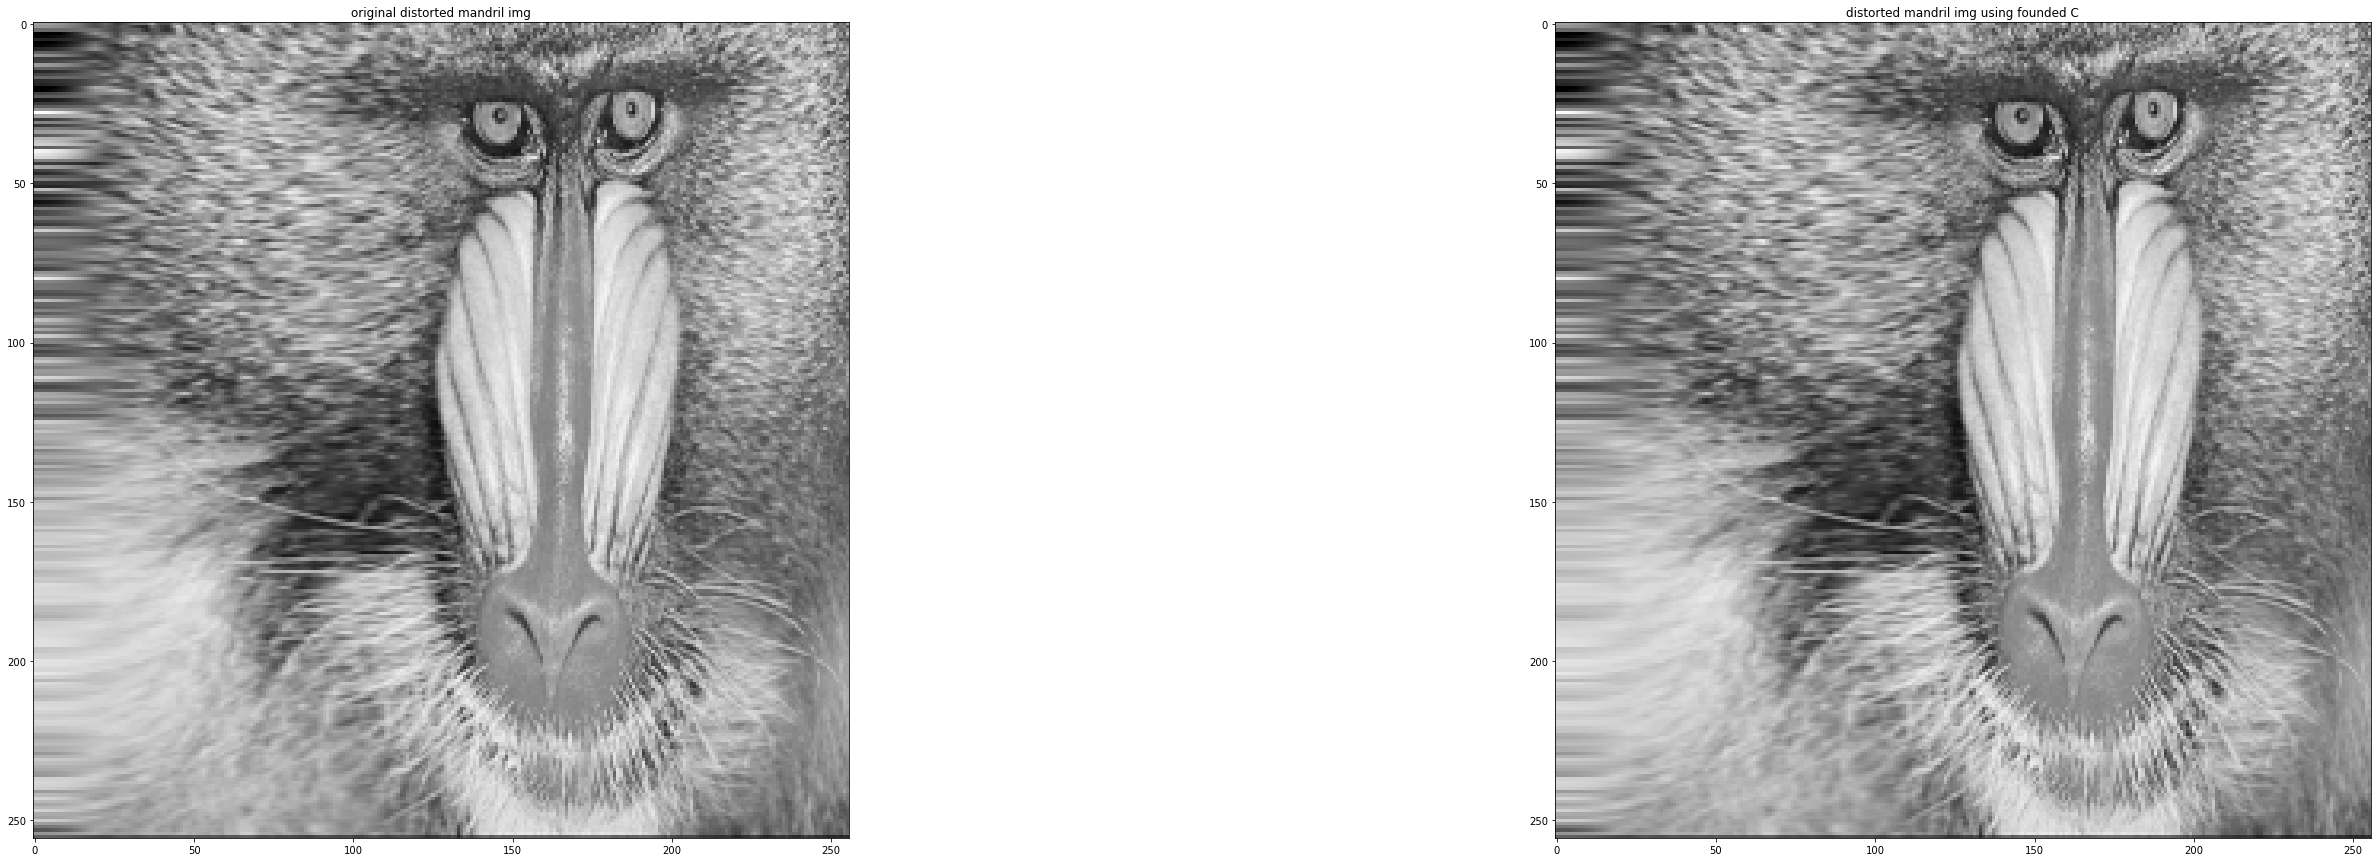

In [18]:
B_dft = np.matmul(A,C_pseo)
mandril_distort_build_trans = np.matmul(DFT_tran_con_256 , B_dft.transpose())

mandril_distort_build = mandril_distort_build_trans.transpose().real

fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(50,15))
axes[0].imshow(np.array(mandril_distort_build), cmap='gray')
axes[0].set_title("original distorted mandril img")
axes[1].imshow(np.array(mandril_distorted), cmap='gray')
axes[1].set_title("distorted mandril img using founded C")
print('The MSE between original distorted img and our distort img using founded C is ', findMSE(mandril_distorted, mandril_distort_build))

We have to do matrix.real because imshow can read only matrix of floats. The imaginary part of each coefficient is
almost zero after getting back from the DFT space, real operator remove this imaginary part.

## 1-d)

In [79]:
butterfly_original = cv2.imread('Butterfly_.png', cv2.IMREAD_GRAYSCALE)
butterfly_original=normalizeTo01(butterfly_original)

In [80]:
coef_butterfly_orig_mat = DFT_coef_mat_256(butterfly_original)
# coefficients
butterfly_dft = coef_butterfly_orig_mat.transpose()
distort_butterfly_dft = np.matmul(butterfly_dft,C_pseo)
butterfly_distort_build_trans = np.matmul(DFT_tran_con_256 , distort_butterfly_dft.transpose())

butterfly_distort_build = butterfly_distort_build_trans.transpose().real



The MSE between original and distorted img using founded C 0.05793189087805317


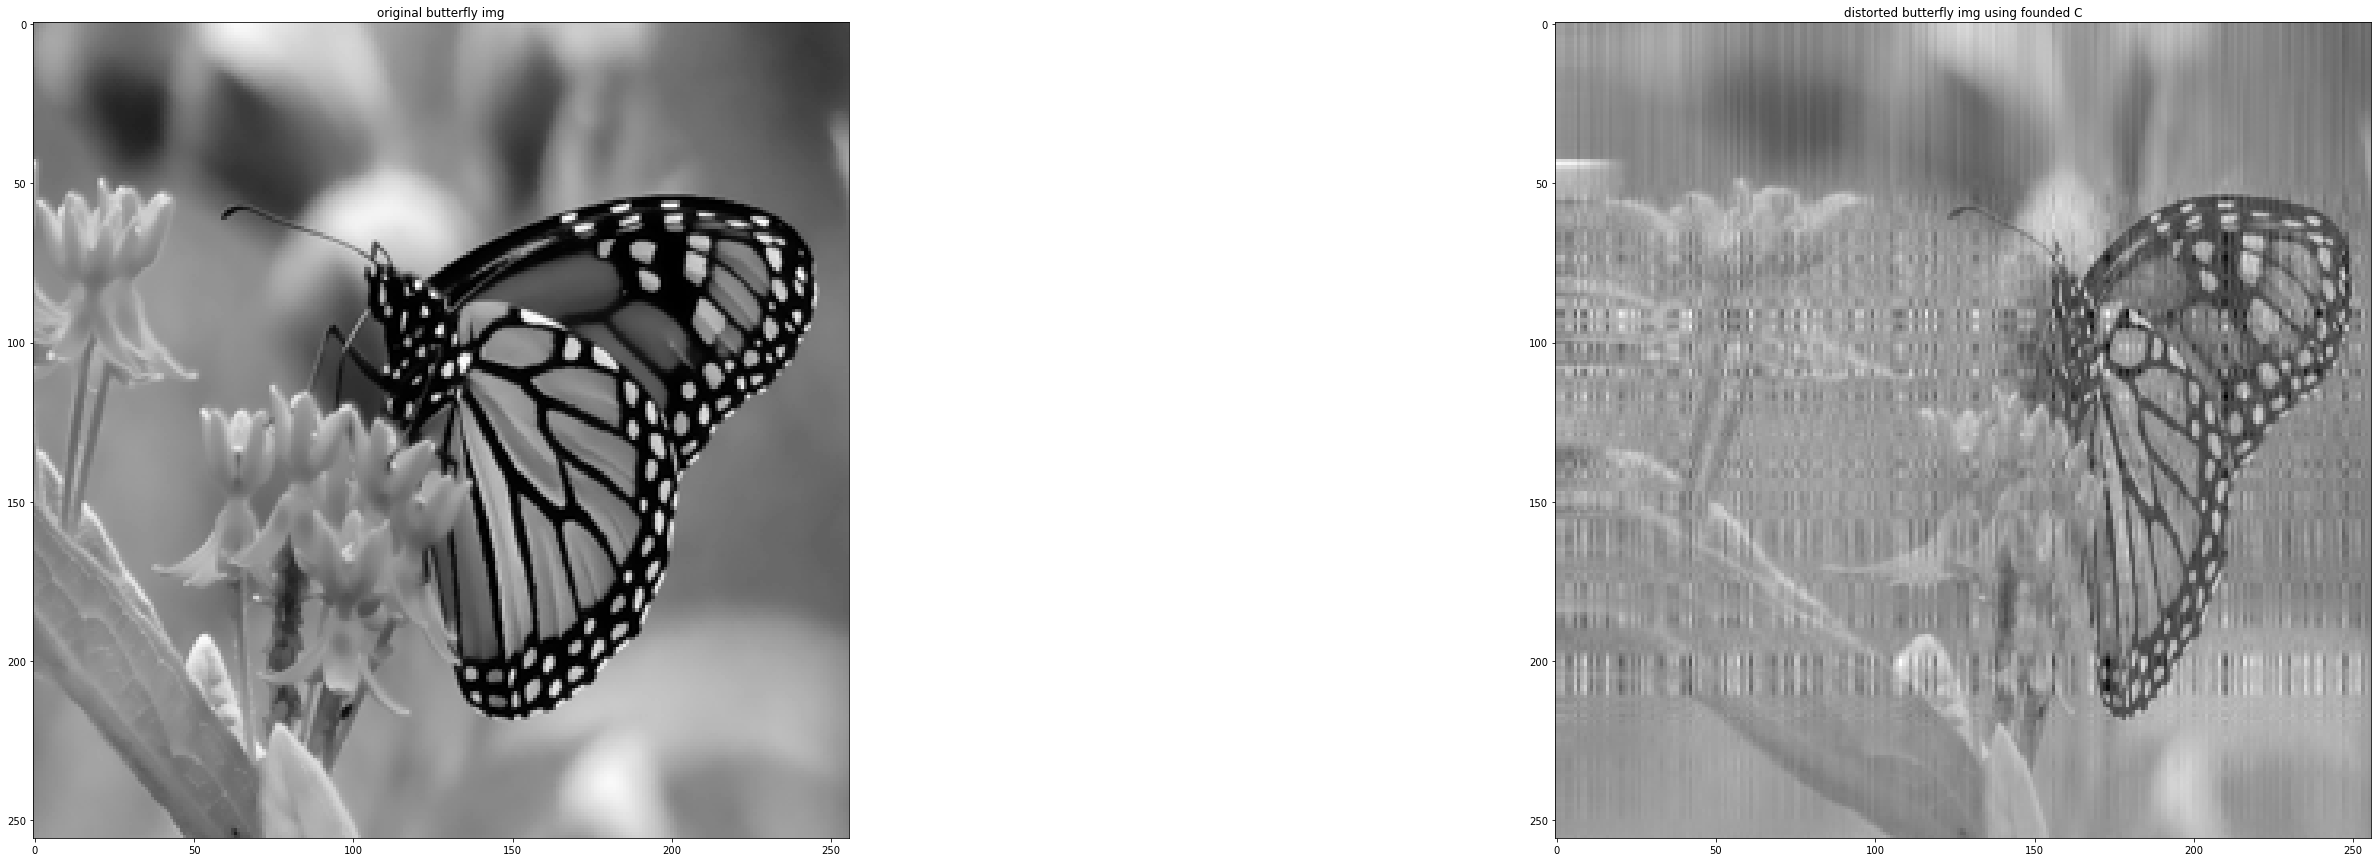

In [81]:
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(50,15))
axes[0].imshow(np.array(butterfly_original), cmap='gray')
axes[0].set_title("original butterfly img")
axes[1].imshow(np.array(butterfly_distort_build), cmap='gray')
axes[1].set_title("distorted butterfly img using founded C")
print('The MSE between original and distorted img using founded C', findMSE(butterfly_original, butterfly_distort_build))

# Q2 - Audio example


We know the noise is added periodically to our signal. We can assume that the period of the distortion is known and it is 512 in entry unit. By that, we can split our signal to groups of 512 entries, the distortion will apply the same on each group. Splitting to groups be reshape our signal to a matrix where each row has 512 entries, we will apply the same approach as we applied in Q1. Meaning finding the functional map - C and using it for our second signal (totoro).

# skycastle

In [82]:
data_sky_orig, samplerate_sky_orig = sf.read('skycastle.wav',dtype='float32')
data_sky_dist, samplerate_sky_dist = sf.read('skycastle-distortion.wav',dtype='float32')

In [83]:
row_num = int(len(data_sky_orig)/512)
col_num = 512
one_col_size =  row_num*col_num

data_sky_orig_mat = data_sky_orig.reshape(row_num , col_num)

data_sky_dist_mat = data_sky_dist.reshape(row_num , col_num)

In [84]:
DFT_sound = DFT_matrix(col_num)
# finds the matrix which it columns are the DFT coefficients of the r-th row of the sound 
def DFT_coef_mat_sound(sound):
    sound_trans=sound.transpose() # DFT on the rows of the original
    return np.matmul(DFT_sound , sound_trans)

In [85]:
data_sky_orig_dft = DFT_coef_mat_sound(data_sky_orig_mat)
data_sky_dist_dft = DFT_coef_mat_sound(data_sky_dist_mat)

In [86]:
# A and B as explained in the PDF at Q1, but we want to find the functional map which transform distorted
#audio to original audio. We want this functional map so we can use it on torto_distorted-audio and
#transform it to the original torto sound.
A = data_sky_dist_dft.transpose()
B = data_sky_orig_dft.transpose()

In [87]:
rank_A = np.linalg.matrix_rank(A)
print('The rank of A is', rank_A)


The rank of A is 512


#### A is full rank matrix, so we can apply pseudo inverse on A
#### C = A_pseoudo_inverse x B

In [88]:
A_pseudo_inv = np.linalg.pinv(A)
C_pseo = np.matmul(A_pseudo_inv , B)
C_pseo_df = pd.DataFrame(C_pseo)
print('The C(functional map ,distort->orig) we found is:')
C_pseo_df

The C(functional map ,distort->orig) we found is:


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.000017-0.000000j,-0.000001+0.000001j,0.000001+0.000003j,-0.000003-0.000004j,0.000000-0.000002j,-0.000001+0.000003j,-0.000000-0.000002j,0.000002-0.000003j,0.000001-0.000001j,0.000005+0.000004j,...,-0.000002-0.000001j,0.000005-0.000004j,0.000001+0.000001j,0.000002+0.000003j,-0.000000+0.000002j,-0.000001-0.000003j,0.000000+0.000002j,-0.000003+0.000004j,0.000001-0.000003j,-0.000001-0.000001j
1,-0.108702-0.400321j,0.617344+0.634341j,0.265106+0.119604j,0.099205-0.029409j,0.026840-0.040094j,0.010708-0.014037j,0.015633+0.002904j,0.021269+0.004051j,0.019606-0.001363j,0.014373-0.004924j,...,-0.005402-0.004365j,-0.006460-0.004824j,-0.006235-0.004694j,-0.006040-0.006054j,-0.006847-0.009804j,-0.011964-0.015269j,-0.019161-0.019356j,-0.022759-0.017264j,-0.007811-0.008063j,0.028660-0.005167j
2,-0.053992-0.075395j,0.277554-0.529702j,-0.002993+0.582695j,0.133580+0.422448j,0.180514+0.140570j,0.130413-0.012479j,0.060154-0.036790j,0.024715-0.006512j,0.022652+0.017965j,0.032253+0.018801j,...,-0.005992-0.007449j,-0.007248-0.010031j,-0.008107-0.011201j,-0.010010-0.012082j,-0.010119-0.012731j,-0.010304-0.015963j,-0.009256-0.026218j,-0.013552-0.044104j,-0.019587-0.061461j,-0.026615-0.055188j
3,0.075903-0.364236j,-0.302784-0.034705j,0.655402-0.200842j,-0.120784+0.169349j,-0.219985+0.363063j,-0.009260+0.315172j,0.139768+0.156583j,0.143289+0.030860j,0.075232-0.008764j,0.025729+0.008887j,...,-0.006442-0.009173j,-0.007270-0.011655j,-0.006300-0.012827j,-0.007164-0.015781j,-0.007806-0.018835j,-0.011506-0.021376j,-0.011782-0.024755j,-0.011201-0.032680j,-0.000601-0.050268j,0.014150-0.078280j
4,0.055467-0.430629j,0.174443+0.018132j,-0.272372-0.448903j,0.515944+0.245252j,0.114362+0.077856j,-0.267596+0.048430j,-0.272024+0.178465j,-0.065237+0.247204j,0.097463+0.185659j,0.125696+0.078408j,...,-0.005427-0.010216j,-0.006789-0.013479j,-0.005923-0.013689j,-0.006528-0.015700j,-0.004919-0.018137j,-0.006681-0.021867j,-0.006119-0.027225j,-0.010481-0.034491j,-0.007178-0.043611j,0.000125-0.057246j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.072823+0.513307j,-0.001604+0.050372j,-0.002012+0.038651j,-0.006201+0.030558j,-0.003535+0.024084j,-0.006317+0.020567j,-0.004116+0.017983j,-0.005567+0.016125j,-0.004470+0.013743j,-0.005803+0.013841j,...,0.034491-0.203840j,-0.107259-0.208076j,-0.248847-0.064740j,-0.238553+0.103845j,-0.057562+0.042456j,0.132646-0.272346j,0.170237-0.257582j,0.202444+0.635042j,0.028786-0.227457j,0.056148+0.134948j
508,0.055467+0.430629j,0.000125+0.057246j,-0.007178+0.043611j,-0.010481+0.034491j,-0.006119+0.027225j,-0.006681+0.021867j,-0.004919+0.018137j,-0.006528+0.015700j,-0.005923+0.013689j,-0.006789+0.013479j,...,0.067127-0.019217j,0.125696-0.078408j,0.097463-0.185659j,-0.065237-0.247204j,-0.272024-0.178465j,-0.267596-0.048430j,0.114362-0.077856j,0.515944-0.245252j,-0.272372+0.448903j,0.174443-0.018132j
509,0.075903+0.364236j,0.014150+0.078280j,-0.000601+0.050268j,-0.011201+0.032680j,-0.011782+0.024755j,-0.011506+0.021376j,-0.007806+0.018835j,-0.007164+0.015781j,-0.006300+0.012827j,-0.007270+0.011655j,...,0.017182-0.034262j,0.025729-0.008887j,0.075232+0.008764j,0.143289-0.030860j,0.139768-0.156583j,-0.009260-0.315172j,-0.219985-0.363063j,-0.120784-0.169349j,0.655402+0.200842j,-0.302784+0.034705j
510,-0.053992+0.075395j,-0.026615+0.055188j,-0.019587+0.061461j,-0.013552+0.044104j,-0.009256+0.026218j,-0.010304+0.015963j,-0.010119+0.012731j,-0.010010+0.012082j,-0.008107+0.011201j,-0.007248+0.010031j,...,0.033688-0.008266j,0.032253-0.018801j,0.022652-0.017965j,0.024715+0.006512j,0.060154+0.036790j,0.130413+0.012479j,0.180514-0.140570j,0.133580-0.422448j,-0.002993-0.582695j,0.277554+0.529702j


In [89]:
# The conjugate transpose matrix of DFT_sound is DFT*
DFT_tran_con_sound = np.conjugate(DFT_sound)
DFT_tran_con_sound_df = pd.DataFrame(DFT_tran_con_sound)


In [90]:
B_dft = np.matmul(A,C_pseo)
skycastle_original_build_trans = np.matmul(DFT_tran_con_sound , B_dft.transpose())

skycastle_original_build = skycastle_original_build_trans.transpose().real

skycastle_original_build_show = skycastle_original_build.reshape((one_col_size))



## Sainity check skyscale

In [42]:
# start playback
play_obj = sd.play(data_sky_orig, samplerate_sky_orig) # all sample rate in the question are equal to 48000

# wait for playback to finish before exiting
status = sd.wait()

In [41]:
approx = skycastle_original_build_show

# start playback
play_obj = sd.play(approx, samplerate_sky_dist)

# wait for playback to finish before exiting
status = sd.wait()
print('MSE between skyscale_original and skyscale after removing ditotion is',np.sum((data_sky_orig - approx)**2)/(len(data_sky_orig)))

MSE between skyscale_original and skyscale after removing ditotion is 1.0709052149783029e-10


# totoro

In [43]:
#samplerate_dist_totoro, data_dist_totoro = wavfile.read('totoro-distortion.wav')
data_dist_totoro,samplerate_dist_totoro = sf.read('totoro-distortion.wav',dtype='float32')

data_dist_totor_mat = data_dist_totoro.reshape(row_num , col_num)


data_dist_totor_show = data_dist_totor_mat.reshape((one_col_size,1))

In [44]:
coef_dist_totoro_mat = DFT_coef_mat_sound(data_dist_totor_mat)
# coefficients
dist_totoro_dft = coef_dist_totoro_mat.transpose()
distort_totoro_dft = np.matmul(dist_totoro_dft,C_pseo)
totoro_original_build_trans = np.matmul(DFT_tran_con_sound , distort_totoro_dft.transpose())


totoro_original_build = totoro_original_build_trans.transpose().real


totoro_original_build_show = totoro_original_build.reshape((one_col_size))


In [48]:
data_orig_totoro,samplerate_orig_totoro = sf.read('totoro.wav',dtype='float32')

The MSE is 2.3605735109022307e-09


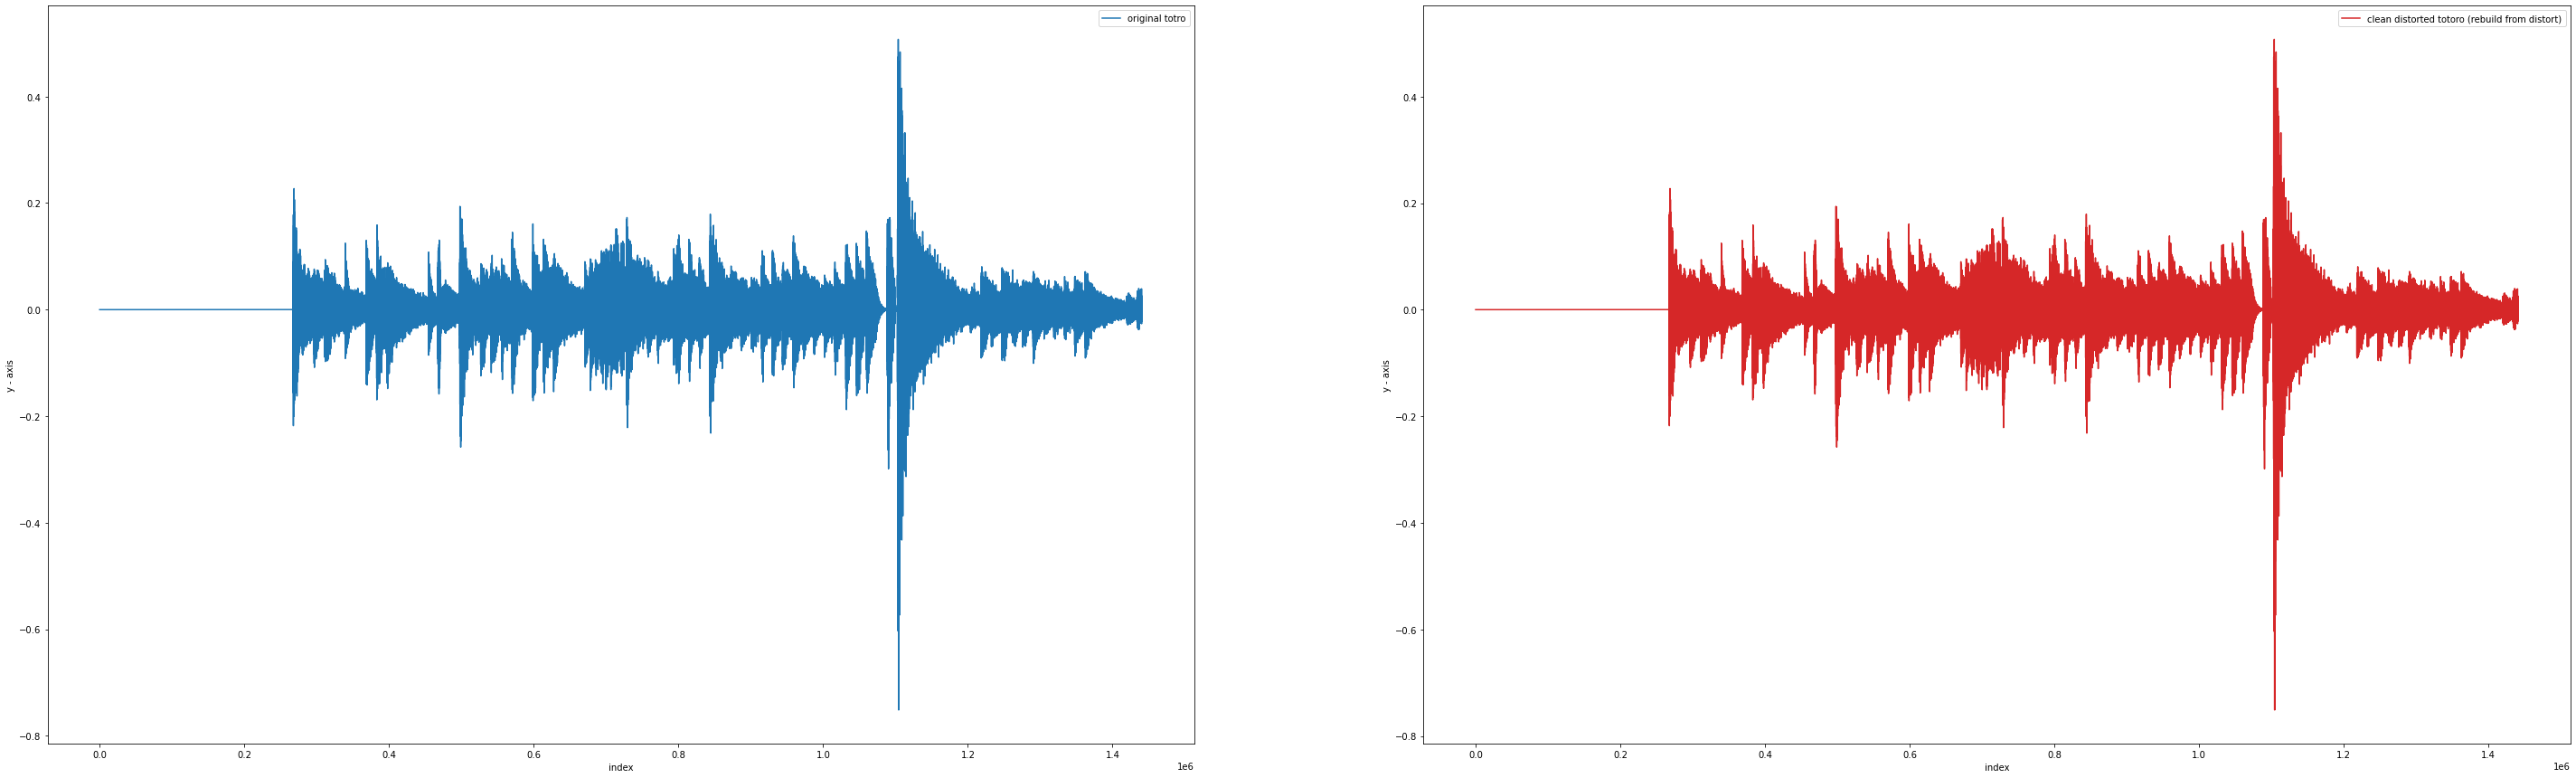

In [49]:
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(50,15))

x_arr = range(0,len(data_orig_totoro)) 


axes[0].plot(x_arr,data_orig_totoro, label="original totro",color='tab:blue') 
axes[0].set(xlabel='index', ylabel="y - axis")
axes[0].legend()


mse = np.sum((data_orig_totoro - totoro_original_build_show)**2)/(len(data_orig_totoro))
print('The MSE is',mse)

axes[1].plot(x_arr,totoro_original_build_show, label="clean distorted totoro (rebuild from distort)",color='tab:red') 
axes[1].set(xlabel='index', ylabel="y - axis")
axes[1].legend()
    

We can see the original totoro and our totoro (which rebuilt by our founded C) are close one to each other.
The MSE is small as we transformed the distort signal back to the original after finding C which add a periodic distortion to our signal.
So, the noise was significantly removed but original sound was not fully recovered.
It is because We cannot restore the attenuated frequencies.


## Sainity check totoro

In [50]:
# start playback
play_obj = sd.play(data_orig_totoro, samplerate_orig_totoro)

# wait for playback to finish before exiting
status = sd.wait()

In [51]:
approx = totoro_original_build_show

# start playback
play_obj = sd.play(approx, samplerate_orig_totoro)

# wait for playback to finish before exiting
status = sd.wait()
print('MSE between skyscale_original and skyscale after removing ditotion is',np.sum((data_orig_totoro - approx)**2)/(len(data_orig_totoro)))

MSE between skyscale_original and skyscale after removing ditotion is 2.3605735109022307e-09
